Практическое задание 3

Тема 3. Библиотеки для анализа данных

Задание

Загрузите статистические данные о коронавирусе из репозитория https://github.com/CSSEGISandData/COVID-19 и сохраните их в переменной coron типа DataFrame. Это можно сделать, используя следующий код:
coron = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',sep=",")
coron

Теперь программно обработайте данный DataFrame, приведя его к следующему виду, убрав ненужные столбцы (Province/State, Lat, Long) и просуммировав значения регионов (Province/State) по каждой стране (Country/Region).

Date – дата, X – номер дня с начала 2020 года, следующие столбцы – названия стран, число – количество пострадавших от COVID-19.
Результатом выполнения задания является программный код, выполняющий преобразования Исходный DataFrame в выходной DataFrame.


In [325]:
import pandas as pd #импортируем библиотеку pandas
from datetime import date, datetime #импортируем библиотеку datetime
coron = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',sep=",") #загружаем таблицу данных
coron #выводим исходную таблицу данных

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/1/22,10/2/22,10/3/22,10/4/22,10/5/22,10/6/22,10/7/22,10/8/22,10/9/22,10/10/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7800,7801,7803,7803,7804,7804,7804,7804,7806,7807
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6879,6879,6879,6879,6879,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5707,5707,5707,5707,5707,5707,5707,5707,5707,5707
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2157,2157,2157,2157,2158,2158,2158,2158,2158,2158
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017


Исходная таблица
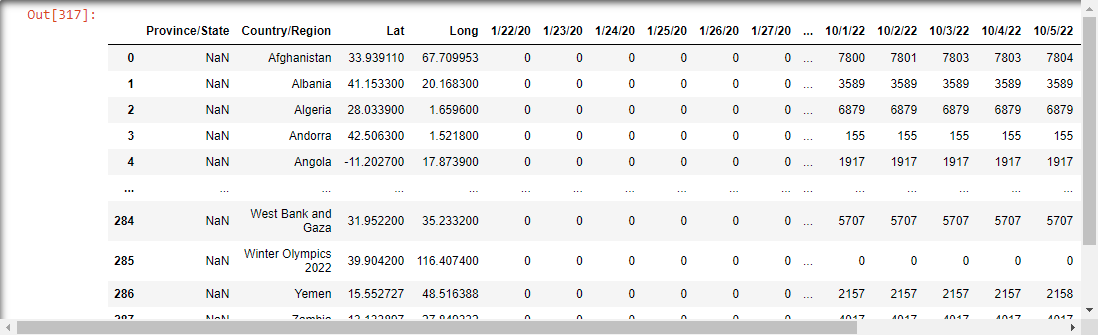

In [326]:
coron = coron.drop(['Province/State', 'Lat', 'Long'], axis=1) #удаляем лишние стобцы
coron.set_index('Country/Region', inplace=True) #удаляем индексы
index = [i for i in coron.columns] #создем список для преобразования дат в нужный формат
for i in range(len(index)):
    index[i] = datetime.strptime(index[i], '%m/%d/%y') #сначала преоброзовываем в тип datetime
    index[i] = index[i].strftime('%Y-%m-%d') #затем преобразовываем в нужный формат отображения
coron.columns = index #присваиваем колонкам новые имена
coron = coron.T #транспонируем таблицу
coron.columns.name = "Date" #переименовываем имя
coron.insert(0, "X", 0) #добавляем колонку Х номер дня с начала 2020 года
coron['X'] = [datetime.strptime(index[i], '%Y-%m-%d').toordinal() - datetime.strptime('2019-12-31', '%Y-%m-%d').toordinal() for i in range(len(coron['X']))] #заполняем столбец Х
coron #выводим итоговую таблицу

Date,X,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,1010,7804,3589,6881,155,1917,0,146,129937,8691,...,7495,1637,14,5818,43151,5707,0,2158,4017,5604
2022-10-07,1011,7804,3589,6881,155,1917,0,146,129937,8691,...,7495,1637,14,5818,43152,5707,0,2158,4017,5604
2022-10-08,1012,7804,3589,6881,155,1917,0,146,129937,8691,...,7495,1637,14,5818,43153,5707,0,2158,4017,5604
2022-10-09,1013,7806,3589,6881,155,1917,0,146,129958,8691,...,7495,1637,14,5818,43153,5707,0,2158,4017,5604


Обработанная таблица
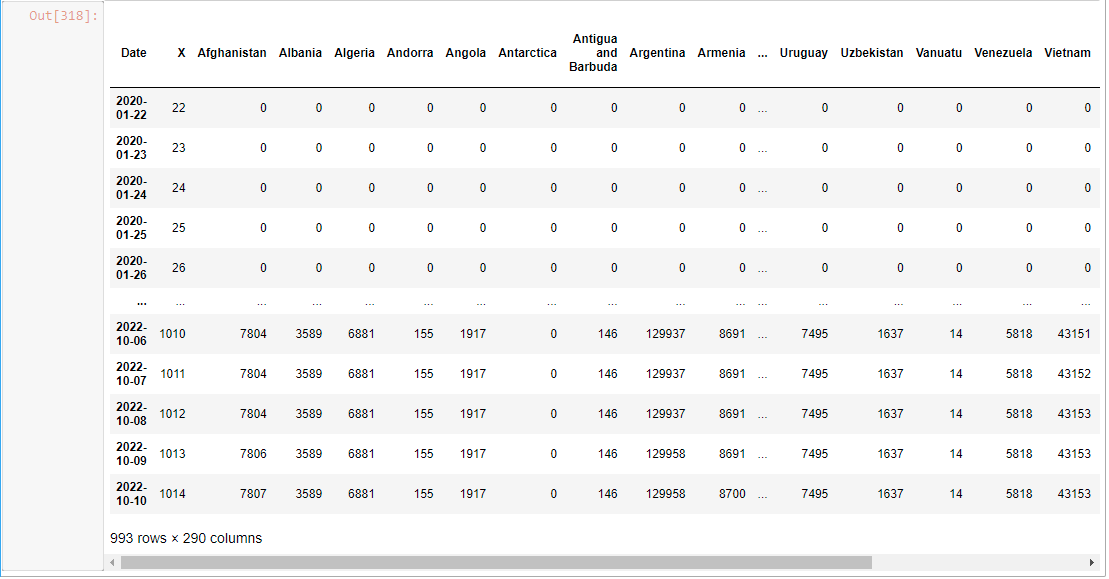

Практическое задание 4

Тема 3. Библиотеки для анализа данных

Задание

Дополните программный код из практического задания 3, выполнив визуализацию данных при помощи matplotlib. Требуется вывести графики  количества пострадавших от COVID-19 человек в зависимости от даты для разных стран. 

Таким образом необходимо визуализировать данные не менее 5 стран по выбору.


In [327]:
import matplotlib.pyplot as plt #импортируем библиотеки
from matplotlib.pyplot import figure
def landGraf(land): #создаем функцию, в которую будем передавать страну
    plt.figure(figsize=(25, 10)) #задаем размер графика
    x = coron.index[0:len(coron.index) - 1:10] #задаем ось х (для удобства через каждые 10 дней)
    y = coron[land][0:len(coron[land]) - 1:10] #задаем ось y
    plt.plot(x, y, color='red', marker='x', linestyle='') #строим график с параметрами маркера и цвета
    plt.title(f"Статистика, {land}", fontsize=20, color="green") #задаем заголовок графика
    plt.ylabel('Пострадавших человек') #задаем подпись оси y
    plt.legend(["Фактические данные"]) #задаем подпись легенды
    plt.xticks(rotation = 90) #переворачиваем подписи оси х для удобства
    plt.grid(True) #выводим сетку
    return plt.show() #выводим график

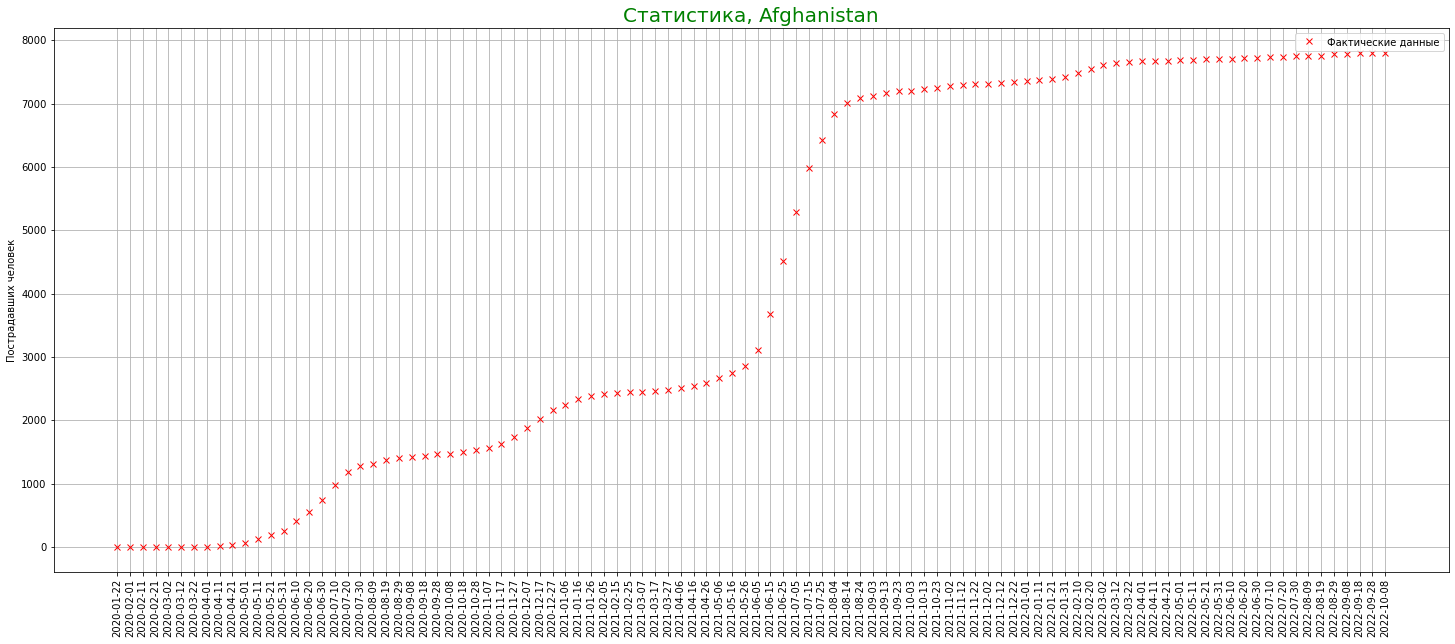

None


In [328]:
print(landGraf('Afghanistan'))

1) Афганитсан
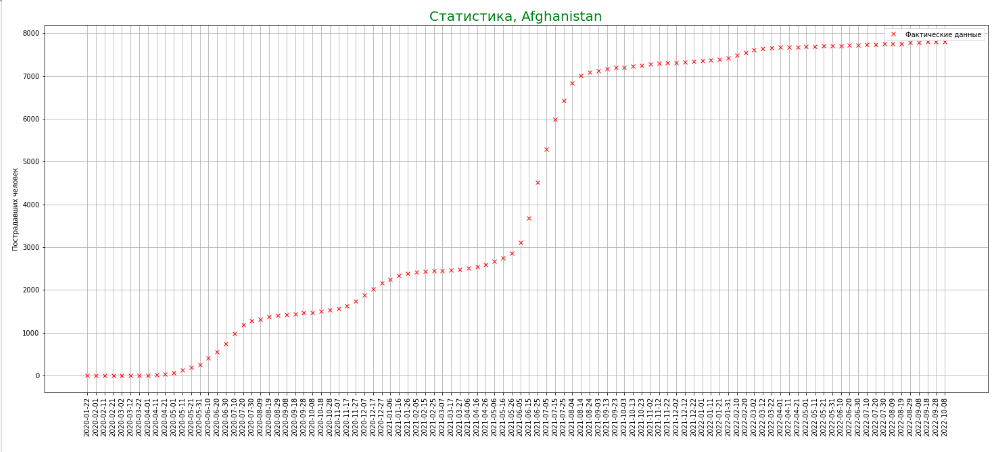

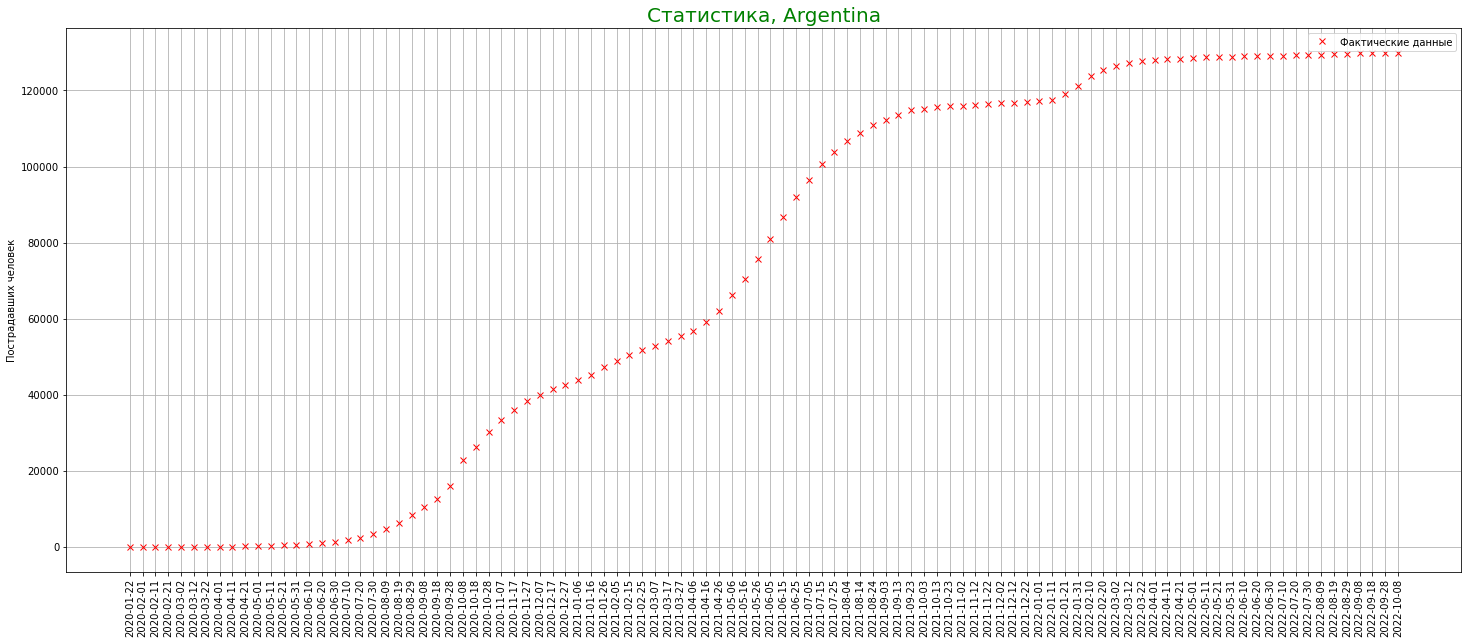

None


In [329]:
print(landGraf('Argentina'))

2) Аргентина
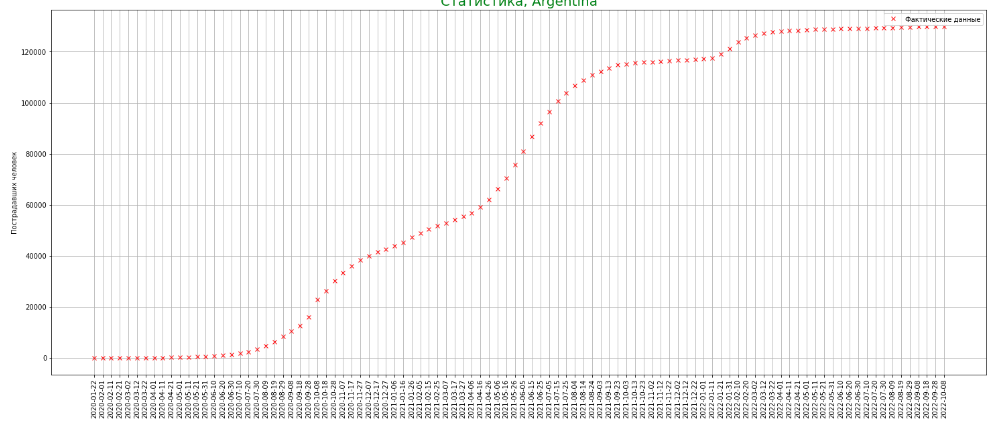

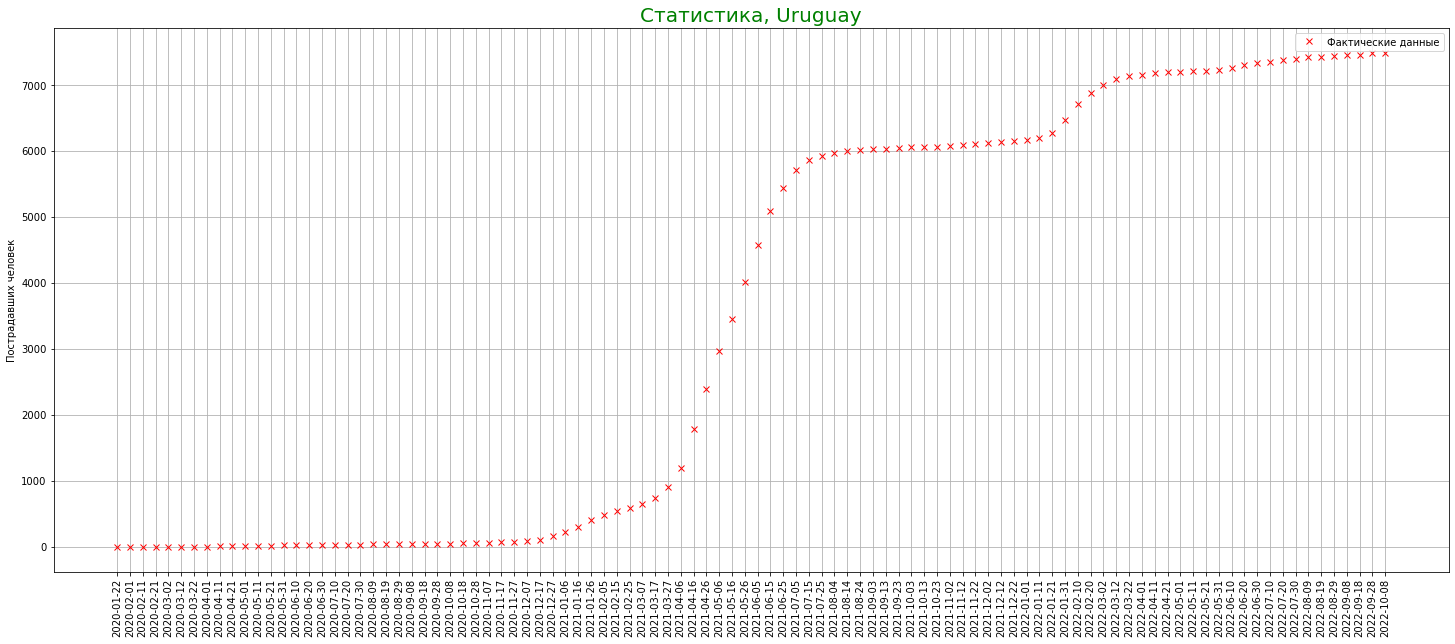

None


In [330]:
print(landGraf('Uruguay'))

3) Уругвай
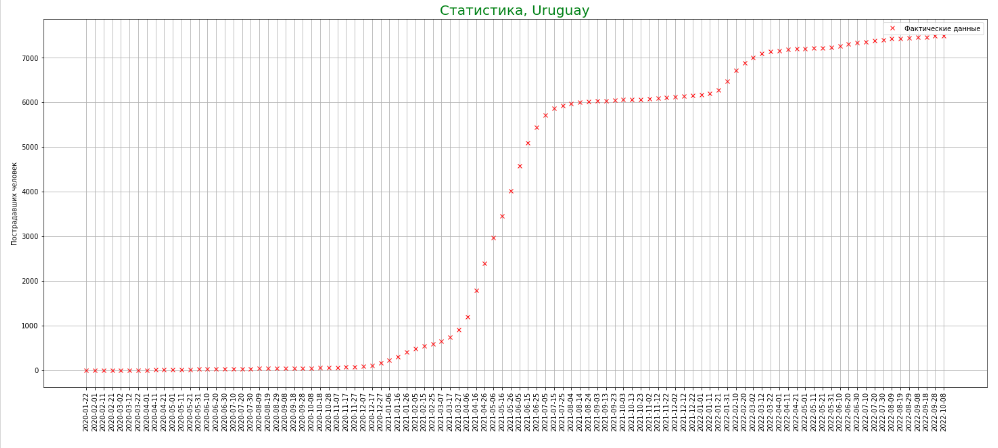

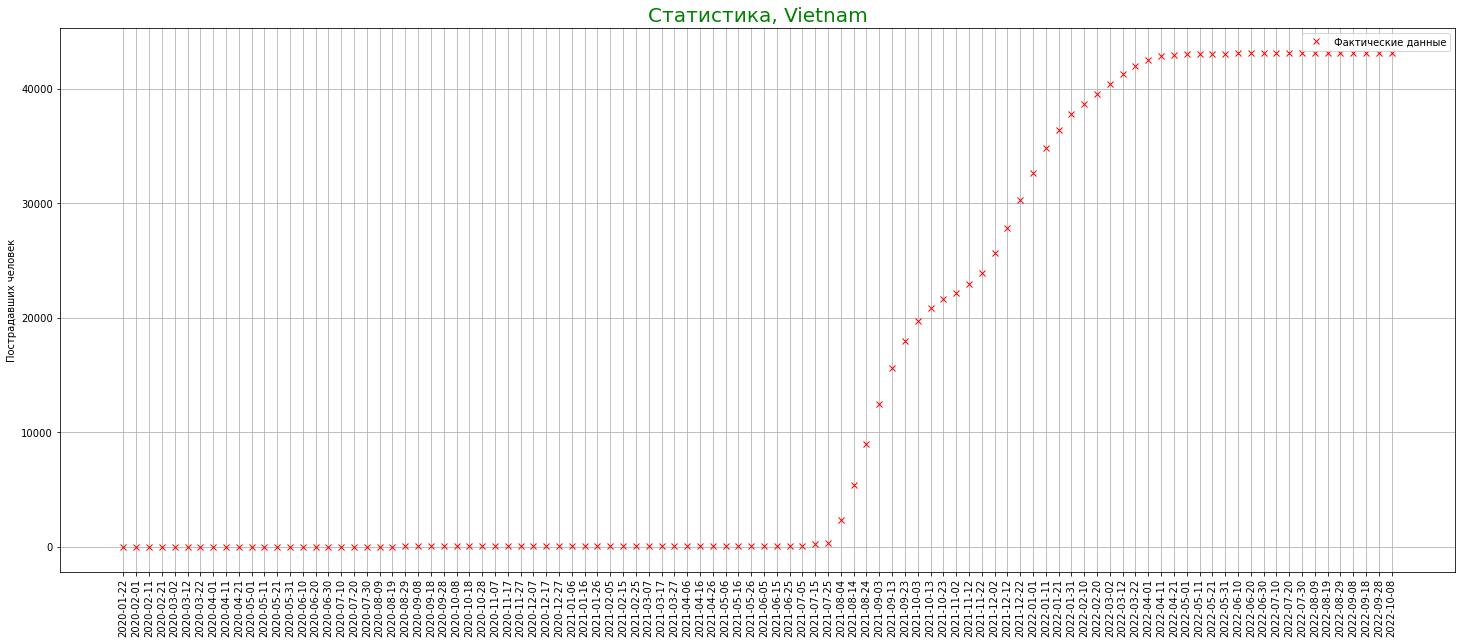

None


In [331]:
print(landGraf('Vietnam'))

4) Вьетнам
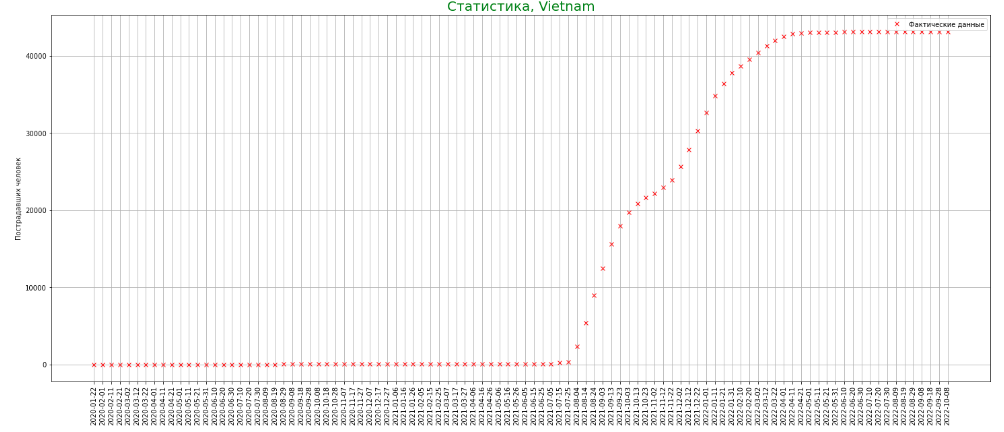

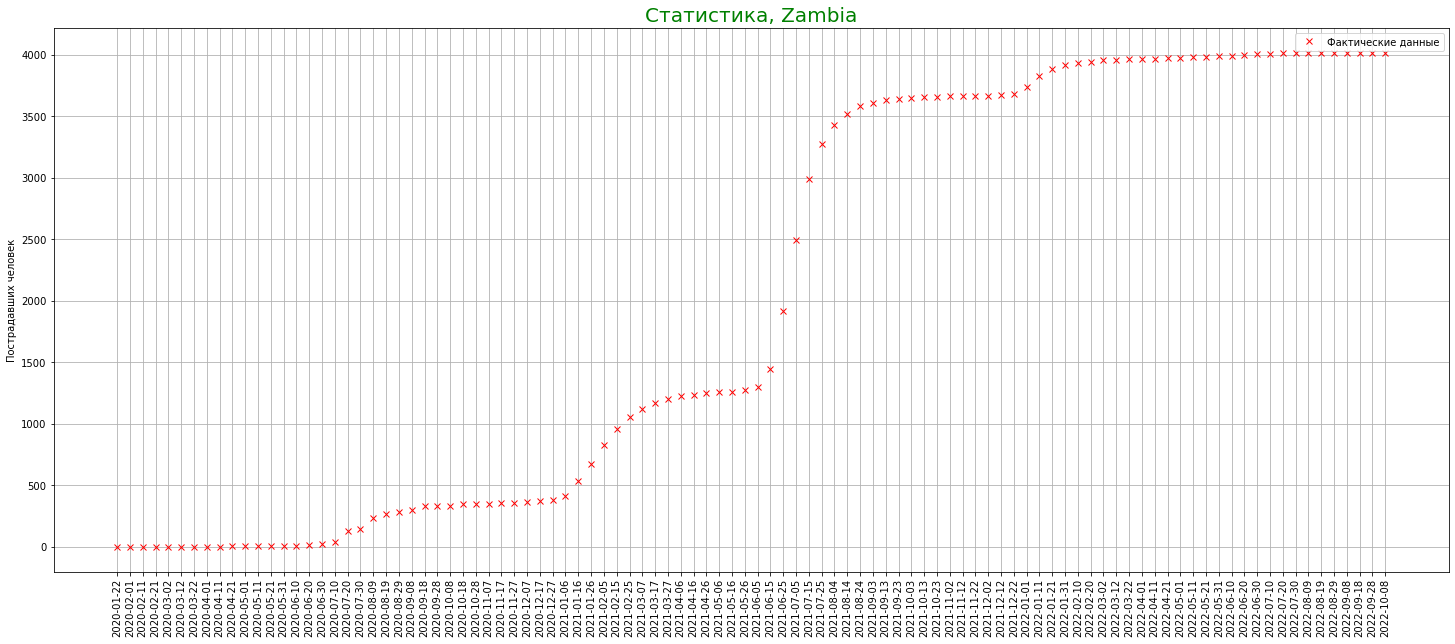

None


In [332]:
print(landGraf('Zambia'))

5) Замбия
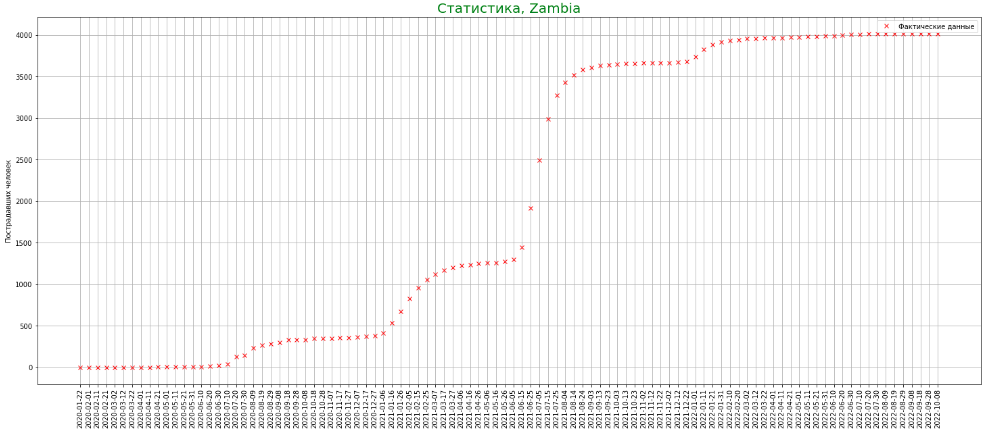